## Data cleaning and Analysis Basics
- this notebook for applying practical exercises for data cleaning and analysis basics 
- in these missions we will learn the basics of data cleaning as most of data scientists spend most of their time cleaning and manipulating data so it is important skill to get :
- we will learn 
    - Data aggregation
    - combining data 
    - transform data
    - clean strings with pandas
    - how to handle missing and duplicate data 
    
    
- we will work with the **World Happiness Report**, annual report created by the UN sustainable Development Solutions Network .the report assigns each country a happiness score between (0 - 10) based on some questions they asked to people to rank their life.
- some factors in the data can give some intuition about the score of happiness in each country as econimic production, social support, freedom , absence of corruption and generosity, although these factors are not used to calculate the happiness score but they can show why each country is taking its score 


- we are going to aggregate the data to get more insights about happiness
- try to know how the happiness changed from 2015 to 2017
- which factors contribute the most to the happinesss core ?

you can read about the world hapiness report 2015 <a href = "https://worldhappiness.report/ed/2015/#appendices-and-data"> here </a> or download the same kind of datasets from <a href = "https://www.kaggle.com/unsdsn/world-happiness/code"> Kaggle</a>

### Introduction to the dataset 
our dataset is csv file called `World_Happiness_2015.csv` let's see some columns we will work with :

- `country`- Name of the country

- `Region` - Name of the region the country belongs to

- `Happiness Rank` - The rank of the country between (0 - 10)

- `Happiness score` - The score of happiness for each country

- `Family` - The estimated extent to which family contributes to happiness score

- `Freedom` - The estimated extent to which freedom contributes to the happiness score

- `Generosity` - The estimated extent to which generosity contributes to the happiness score

**let's enjoy with our happiness scores**

In [1]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# read the dataset 
happiness2015 = pd.read_csv("World_Happiness_2015.csv")

first7 = happiness2015.head(7)   # first 7 rows of data

# show some information 
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [2]:
# show dataframe 
first7

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570


## 1.Data Aggregation 

**using loops to aggregate the data**
- let's plot the happiness score for all countries 

<AxesSubplot:title={'center':'Happiness scoe'}>

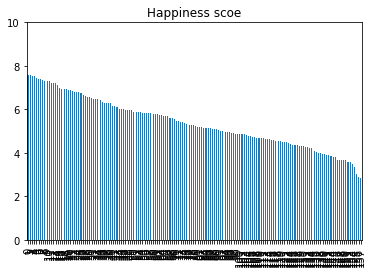

In [6]:
happiness2015["Happiness Score"].plot(kind = "bar", title = "Happiness scoe" , ylim = (0,10))


there is no benefit from the previous plot because alot of data points ar there we can not see  each country individually clearly 

let's take a look for the unique regions in the `Region` column where each country is assigned to specific region 

In [8]:
# check the unique values in Region column
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

let's try to plot just one region from previous ones 

<AxesSubplot:title={'center':'sothe Asia hapiness score'}, ylabel='Country'>

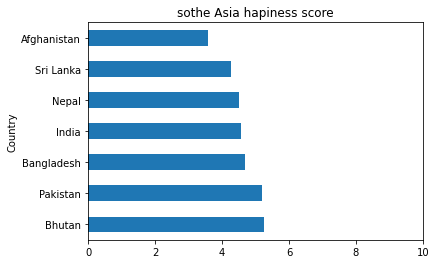

In [148]:
# plotting southern Asia
so_asia = happiness2015[happiness2015["Region"] == "Southern Asia"]

so_asia.plot(x = "Country" , y = "Happiness Score" , kind = "barh" , xlim = (0,10), 
            title = "sothe Asia hapiness score", legend = False)

the  plot for south asian countries is much easier to read now but we can not get a concolusion about it compared to the other regions all over the world in the report 

we need to aggregate the data for the regions e.g: we can get the average score for each region  and the try to plot it 

(0.0, 10.0)

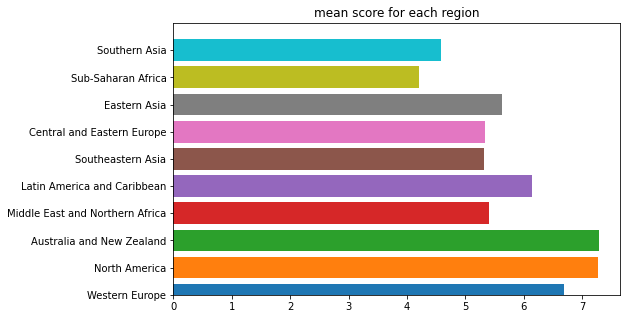

In [153]:
# try to use for loops with pandas t aggregate the data 
mean_happiness = {}
regions = happiness2015["Region"].unique()

for r in regions :
    region_countries = happiness2015[happiness2015["Region"] == r]
    mean_score = region_countries["Happiness Score"].mean()
    mean_happiness[r] = mean_score

plt.figure(figsize= (8,5))    

for k, v in mean_happiness.items():
    plt.barh(k ,v)
    
    
plt.title("mean score for each region")
plt.ylim(0,10)


break the previous cell into 3 parts
1. Split the dataframe into groups
2. Apply function to each group
3. combine the results ino one data structure

the same can happen with pandas `groupby` operation

**hint** choosing a column with `groupby` is important and we choosethe columns with the same values for multiple rows 

here the `Region` column is good choice it has repeated regions cause some countries locate together in the same region

In [28]:
happiness2015["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [47]:
# grouping the data with Region 
happiness2015.groupby(by = "Region")  # groupby object needs aggregation function or method


let's understand some methods we can use with groupby object to understand more about the data /

In [36]:
grouped = happiness2015.groupby(by = "Region")

# use get_group method to choose one of them 
grouped.get_group("North America")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [43]:
aus_nz = happiness2015.groupby(by = "Region").get_group('Australia and New Zealand')
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


`groupby().groups`

In [49]:
grouped = happiness2015.groupby("Region")
grouped.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

the result here a dictionary containing region names and the values is the index number for each values or each country here 

In [50]:
happiness2015.iloc[[8,9], :]  # the first value

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [55]:
# check North America countries 
happiness2015.groupby("Region").groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [157]:

# print the index of the same group but from the dictionary of groupby.groups
print(happiness2015.groupby("Region").groups["North America"])
print(happiness2015.iloc[[4,14]].index)

# show the north american countries 
happiness2015.groupby("Region").get_group("North America")


Int64Index([4, 14], dtype='int64')
Int64Index([4, 14], dtype='int64')


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


### commom aggregation methods with groupby 
`size() , mean(), sum(), count(), min(), max()`

In [73]:
# number of rows for each group
happiness2015.groupby("Region").size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [76]:
# show the means for each group
means = happiness2015.groupby("Region").mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


### aggregation for columns with groupby 

In [80]:
# use specific column from the groups
grouped = happiness2015.groupby("Region")
happy_score = grouped["Happiness Score"]

# aggregate for one column 
happy_score.mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [84]:
# another way 
means = happiness2015.groupby("Region").mean()
happy_mean = means["Happiness Score"]
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [86]:
means = happiness2015.groupby("Region").mean()
means["Family"] # mean for the family for each region

Region
Australia and New Zealand          1.314450
Central and Eastern Europe         1.053042
Eastern Asia                       1.099427
Latin America and Caribbean        1.104720
Middle East and Northern Africa    0.920490
North America                      1.284860
Southeastern Asia                  0.940468
Southern Asia                      0.645321
Sub-Saharan Africa                 0.809085
Western Europe                     1.247302
Name: Family, dtype: float64

In [91]:
# 2 columns
means = happiness2015.groupby("Region").mean()
means[["Happiness Score" , "Family"]]

,Happiness Score,Family
Region,,
Australia and New Zealand,7.285000,1.314450
Central and Eastern Europe,5.332931,1.053042
Eastern Asia,5.626167,1.099427
Latin America and Caribbean,6.144682,1.104720
Middle East and Northern Africa,5.406900,0.920490
North America,7.273000,1.284860
Southeastern Asia,5.317444,0.940468
Southern Asia,4.580857,0.645321
Sub-Saharan Africa,4.202800,0.809085




what if we want more than one kind of aggregation on a column ? 

e.g we want the mean and the max happiness score for each region 

solution : use `df.groupby()` to get the min then for max individually 

In [94]:
# 
means = happiness2015.groupby("Region").mean()
means["Happiness Score"]

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [95]:
max_scores = happiness2015.groupby("Region").max()
max_scores["Happiness Score"]

Region
Australia and New Zealand          7.286
Central and Eastern Europe         6.505
Eastern Asia                       6.298
Latin America and Caribbean        7.226
Middle East and Northern Africa    7.278
North America                      7.427
Southeastern Asia                  6.798
Southern Asia                      5.253
Sub-Saharan Africa                 5.477
Western Europe                     7.587
Name: Happiness Score, dtype: float64

**intro to `Agg()` method** for more than one aggregation method

`GroupBy.agg([fun_1, func_2,  func_3])` passing the function name without parentheses

In [103]:
# let's play 
happiness2015.groupby("Region").agg([np.mean, np.std])

Happiness Rank            Happiness Score  \
                                          mean        std            mean   
Region                                                                      
Australia and New Zealand             9.500000   0.707107        7.285000   
Central and Eastern Europe           79.000000  26.667262        5.332931   
Eastern Asia                         64.500000  24.688054        5.626167   
Latin America and Caribbean          46.909091  28.716859        6.144682   
Middle East and Northern Africa      77.600000  43.213546        5.406900   
North America                        10.000000   7.071068        7.273000   
Southeastern Asia                    81.222222  39.917971        5.317444   
Southern Asia                       113.142857  26.573349        4.580857   
Sub-Saharan Africa                  127.900000  22.863923        4.202800   
Western Europe                       29.523810  29.268787        6.689619   

                                          Standard Error            \
                                      std           mean       std   
Region                                                               
Australia and New Zealand        0.001414       0.037270  0.005035   
Central and Eastern Europe       0.570446       0.045208  0.008952   
Eastern Asia                     0.554053       0.037225  0.008719   
Latin America and Caribbean      0.728560       0.061127  0.024361   
Middle East and Northern Africa  1.101382       0.046337  0.010808   
North America                    0.217789       0.036960  0.002022   
Southeastern Asia                0.950020       0.042691  0.012190   
Southern Asia                    0.570526       0.032161  0.005933   
Sub-Saharan Africa               0.609557       0.055299  0.018757   
Western Europe                   0.824582       0.037625  0.010144   

                                Economy (GDP per Capita)              Family  \
                                                    mean       std      mean   
Region                                                                         
Australia and New Zealand                       1.291880  0.058973  1.314450   
Central and Eastern Europe                      0.942438  0.218499  1.053042   
Eastern Asia                                    1.151780  0.232465  1.099427   
Latin America and Caribbean                     0.876815  0.214501  1.104720   
Middle East and Northern Africa                 1.066973  0.319014  0.920490   
North America                                   1.360400  0.048239  1.284860   
Southeastern Asia                               0.789054  0.375874  0.940468   
Southern Asia                                   0.560486  0.205185  0.645321   
Sub-Saharan Africa                              0.380473  0.282264  0.809085   
Western Europe                                  1.298596  0.096341  1.247302   

                                          Health (Life Expectancy)            \
                                      std                     mean       std   
Region                                                                         
Australia and New Zealand        0.007382                 0.919965  0.016398   
Central and Eastern Europe       0.217005                 0.718774  0.081339   
Eastern Asia                     0.148973                 0.877388  0.153824   
Latin America and Caribbean      0.143416                 0.703870  0.108986   
Middle East and Northern Africa  0.237590                 0.705616  0.107284   
North America                    0.053387                 0.883710  0.031000   
Southeastern Asia                0.209863                 0.677357  0.158662   
Southern Asia                    0.337682                 0.540830  0.123343   
Sub-Saharan Africa               0.267819                 0.282332  0.145906   
Western Europe                   0.135195                 0.909148  0.026834   

                                  Fre

In [159]:
# passing the name of function as string also works
happiness2015.groupby("Region").agg(["mean" , "max"])

Happiness Rank      Happiness Score         \
                                          mean  max            mean    max   
Region                                                                       
Australia and New Zealand             9.500000   10        7.285000  7.286   
Central and Eastern Europe           79.000000  134        5.332931  6.505   
Eastern Asia                         64.500000  100        5.626167  6.298   
Latin America and Caribbean          46.909091  119        6.144682  7.226   
Middle East and Northern Africa      77.600000  156        5.406900  7.278   
North America                        10.000000   15        7.273000  7.427   
Southeastern Asia                    81.222222  145        5.317444  6.798   
Southern Asia                       113.142857  153        4.580857  5.253   
Sub-Saharan Africa                  127.900000  158        4.202800  5.477   
Western Europe                       29.523810  102        6.689619  7.587   

                                Standard Error           \
                                          mean      max   
Region                                                    
Australia and New Zealand             0.037270  0.04083   
Central and Eastern Europe            0.045208  0.06913   
Eastern Asia                          0.037225  0.05051   
Latin America and Caribbean           0.061127  0.13693   
Middle East and Northern Africa       0.046337  0.07832   
North America                         0.036960  0.03839   
Southeastern Asia                     0.042691  0.06698   
Southern Asia                         0.032161  0.03751   
Sub-Saharan Africa                    0.055299  0.11068   
Western Europe                        0.037625  0.05635   

                                Economy (GDP per Capita)             Family  \
                                                    mean      max      mean   
Region                                                                        
Australia and New Zealand                       1.291880  1.33358  1.314450   
Central and Eastern Europe                      0.942438  1.18498  1.053042   
Eastern Asia                                    1.151780  1.38604  1.099427   
Latin America and Caribbean                     0.876815  1.21183  1.104720   
Middle East and Northern Africa                 1.066973  1.69042  0.920490   
North America                                   1.360400  1.39451  1.284860   
Southeastern Asia                               0.789054  1.52186  0.940468   
Southern Asia                                   0.560486  0.83524  0.645321   
Sub-Saharan Africa                              0.380473  1.06024  0.809085   
Western Europe                                  1.298596  1.56391  1.247302   

                                         Health (Life Expectancy)           \
                                     max                     mean      max   
Region                                                                       
Australia and New Zealand        1.31967                 0.919965  0.93156   
Central and Eastern Europe       1.34043                 0.718774  0.87337   
Eastern Asia                     1.30060                 0.877388  1.01328   
Latin America and Caribbean      1.30477                 0.703870  0.86027   
Middle East and Northern Africa  1.22393                 0.705616  0.91387   
North America                    1.32261                 0.883710  0.90563   
Southeastern Asia                1.26504                 0.677357  1.02525   
Southern Asia                    1.10395                 0.540830  0.70806   
Sub-Saharan Africa               1.18468                 0.282332  0.70950   
Western Europe                   1.40223                 0.909148  0.95562   

                                  Freedom           \
                                     mean      max   
Region                                               
Australia and New Zealand        0.645310  0

In [107]:
grouped = happiness2015.groupby("Region")
max_mean_happ = grouped.agg([np.max, np.mean])
max_mean_happ["Happiness Score"]

,amax,mean
Region,,
Australia and New Zealand,7.286,7.285000
Central and Eastern Europe,6.505,5.332931
Eastern Asia,6.298,5.626167
Latin America and Caribbean,7.226,6.144682
Middle East and Northern Africa,7.278,5.406900
North America,7.427,7.273000
Southeastern Asia,6.798,5.317444
Southern Asia,5.253,4.580857
Sub-Saharan Africa,5.477,4.202800


In [162]:
# create your function and pass it to aggergation method
def diff(group):
    return group.max() - group.mean()

happiness2015.groupby("Region")["Happiness Score"].agg([diff])

,dif
Region,
Australia and New Zealand,0.001000
Central and Eastern Europe,1.172069
Eastern Asia,0.671833
Latin America and Caribbean,1.081318
Middle East and Northern Africa,1.871100
North America,0.154000
Southeastern Asia,1.480556
Southern Asia,0.672143
Sub-Saharan Africa,1.274200


In [114]:
grouped.agg([dif, np.mean, np.max])["Happiness Score"]

,dif,mean,amax
Region,,,
Australia and New Zealand,0.001000,7.285000,7.286
Central and Eastern Europe,1.172069,5.332931,6.505
Eastern Asia,0.671833,5.626167,6.298
Latin America and Caribbean,1.081318,6.144682,7.226
Middle East and Northern Africa,1.871100,5.406900,7.278
North America,0.154000,7.273000,7.427
Southeastern Asia,1.480556,5.317444,6.798
Southern Asia,0.672143,4.580857,5.253
Sub-Saharan Africa,1.274200,4.202800,5.477


In [117]:
# happiness means with aggregation 
means = happiness2015.groupby("Region").agg([np.mean])
means["Happiness Score"]

,mean
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [119]:
# max for each family 
fam_max = happiness2015.groupby("Region").agg([np.max])["Family"]
fam_max

,amax
Region,
Australia and New Zealand,1.31967
Central and Eastern Europe,1.34043
Eastern Asia,1.30060
Latin America and Caribbean,1.30477
Middle East and Northern Africa,1.22393
North America,1.32261
Southeastern Asia,1.26504
Southern Asia,1.10395
Sub-Saharan Africa,1.18468


In [121]:
happiness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [127]:
# same result ith agg()
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean])

,mean
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


## aggregation with pivot ables

In [128]:
# try to get the previos cell output with the pivot tables 
happiness2015.pivot_table(values = "Happiness Score" , index = "Region" , aggfunc= np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


- with the dataframe we can use plotting methods normally 


<AxesSubplot:ylabel='Region'>

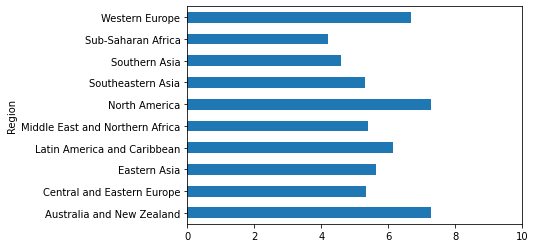

In [139]:
pv_happiness =  happiness2015.pivot_table(values = ["Happiness Score"] , index = 'Region')


pv_happiness.plot(kind = "barh" ,  xlim = (0,10) , legend = False)

<AxesSubplot:title={'center':'mean happiness scores byt region'}, ylabel='Region'>

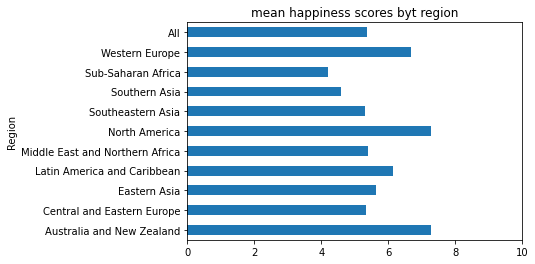

In [140]:
pv_happiness =  happiness2015.pivot_table(values = ["Happiness Score"] , index = 'Region', 
                                         margins= True)


pv_happiness.plot(kind = "barh" ,  xlim = (0,10) , legend = False, 
                  title = "mean happiness scores byt region" )

In [143]:
# check the world mean happiness compared to All bar in the plot 
# test
happiness2015["Happiness Score"].mean()

5.3757341772151905

In [146]:
# multiple columns and multiple functions 
happiness2015.pivot_table(values = ["Happiness Score" , "Family"] , index = "Region" , 
                         aggfunc= [np.mean, np.max, np.std], margins = True)

mean                     amax  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.31967   
Central and Eastern Europe       1.053042        5.332931  1.34043   
Eastern Asia                     1.099427        5.626167  1.30060   
Latin America and Caribbean      1.104720        6.144682  1.30477   
Middle East and Northern Africa  0.920490        5.406900  1.22393   
North America                    1.284860        7.273000  1.32261   
Southeastern Asia                0.940468        5.317444  1.26504   
Southern Asia                    0.645321        4.580857  1.10395   
Sub-Saharan Africa               0.809085        4.202800  1.18468   
Western Europe                   1.247302        6.689619  1.40223   
All                              0.991046        5.375734  1.40223   

                                                      std                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  0.007382        0.001414  
Central and Eastern Europe                6.505  0.217005        0.570446  
Eastern Asia                              6.298  0.148973        0.554053  
Latin America and Caribbean               7.226  0.143416        0.728560  
Middle East and Northern Africa           7.278  0.237590        1.101382  
North America                             7.427  0.053387        0.217789  
Southeastern Asia                         6.798  0.209863        0.950020  
Southern Asia                             5.253  0.337682        0.570526  
Sub-Saharan Africa                        5.477  0.267819        0.609557  
Western Europe                            7.587  0.135195        0.824582  
All                                       7.587  0.271506        1.141381

# 2.Combining Data With Pandas 